In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [2]:
# Load in dataframe
df = pd.read_csv('../Data/train.csv')

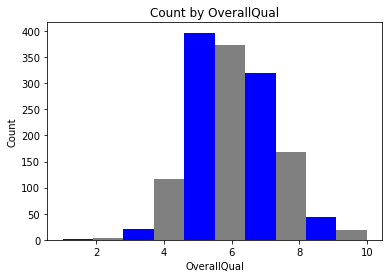

In [3]:
# Histogram of count of each OverallQuality rating
n,bin1,patches = plt.hist(df['OverallQual'])
for i in range(0,10,2):
    patches[i].set_fc("blue")
for i in range(1,11,2):
    patches[i].set_fc("gray")
plt.xlabel("OverallQual")
plt.ylabel("Count")
plt.title("Count by OverallQual")
plt.show()
# Average quality falls slightly on the higher side

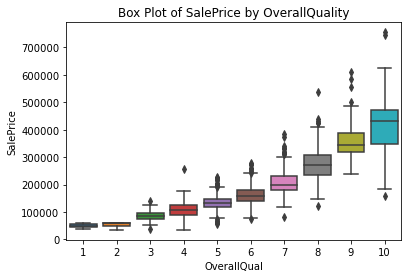

In [4]:
# Boxplot of SalePrice by OverallQuality
sns.boxplot(x=df['OverallQual'],y=df['SalePrice'])
plt.title('Box Plot of SalePrice by OverallQuality')
plt.show()
# Higher overall quality leads to higher average prices with greater spread

In [5]:
# Average price for each quality rating
print(round(df.groupby('OverallQual')['SalePrice'].mean(),2))

OverallQual
1      50150.00
2      51770.33
3      87473.75
4     108420.66
5     133523.35
6     161603.03
7     207716.42
8     274735.54
9     367513.02
10    438588.39
Name: SalePrice, dtype: float64


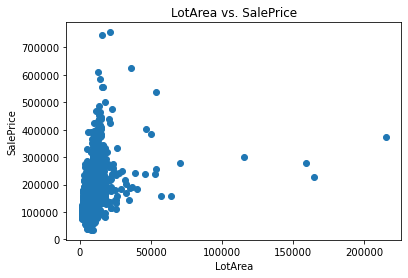

In [6]:
# Scatterplot of LotArea of SalePrice
y = 'SalePrice'
x = 'LotArea'
plt.scatter(df[x],df[y])
plt.ylabel(y)
plt.xlabel(x)
plt.title(f'{x} vs. {y}')
plt.show()

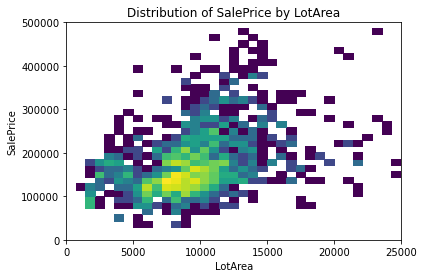

In [7]:
# Shows the distribution  of SalePrice by LotArea - focuses on the cluttered area in the scatterplot
plt.hist2d(df['LotArea'], df['SalePrice'], range = [[0, 25000], [0, 500000]], bins = 35, norm=colors.LogNorm())
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.title("Distribution of SalePrice by LotArea")
plt.show()
# Can see where most of the data is clustered

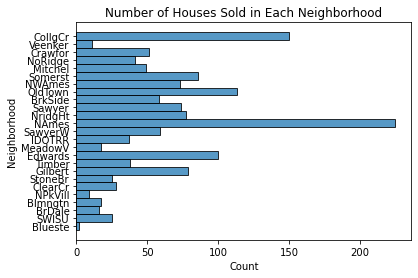

   Neighborhood  Count
0       Blmngtn     17
1       Blueste      2
2        BrDale     16
3       BrkSide     58
4       ClearCr     28
5       CollgCr    150
6       Crawfor     51
7       Edwards    100
8       Gilbert     79
9        IDOTRR     37
10      MeadowV     17
11      Mitchel     49
12        NAmes    225
13      NPkVill      9
14       NWAmes     73
15      NoRidge     41
16      NridgHt     77
17      OldTown    113
18        SWISU     25
19       Sawyer     74
20      SawyerW     59
21      Somerst     86
22      StoneBr     25
23       Timber     38
24      Veenker     11


In [8]:
# Number of houses sold in each neighborhood
sns.histplot(data = df, y = 'Neighborhood')
plt.title('Number of Houses Sold in Each Neighborhood')
plt.show()
group = df.groupby('Neighborhood').size().reset_index(name = 'Count')
print(group)

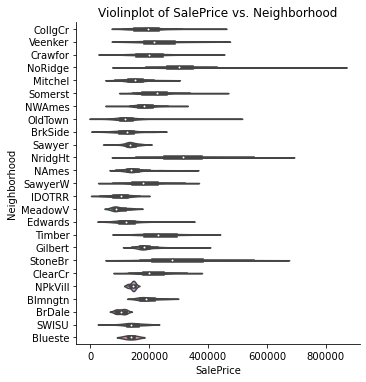

Neighborhood
Blmngtn    194870.88
Blueste    137500.00
BrDale     104493.75
BrkSide    124834.05
ClearCr    212565.43
CollgCr    197965.77
Crawfor    210624.73
Edwards    128219.70
Gilbert    192854.51
IDOTRR     100123.78
MeadowV     98576.47
Mitchel    156270.12
NAmes      145847.08
NPkVill    142694.44
NWAmes     189050.07
NoRidge    335295.32
NridgHt    316270.62
OldTown    128225.30
SWISU      142591.36
Sawyer     136793.14
SawyerW    186555.80
Somerst    225379.84
StoneBr    310499.00
Timber     242247.45
Veenker    238772.73
Name: SalePrice, dtype: float64


In [9]:
# Sale price for each neighborhood
sns.catplot(x="SalePrice", y="Neighborhood",kind="violin", data=df)
plt.title('Violinplot of SalePrice vs. Neighborhood')
plt.show()
print(round(df.groupby('Neighborhood')['SalePrice'].mean(),2))
# As expected, some neighborhoods are more expensive than others.

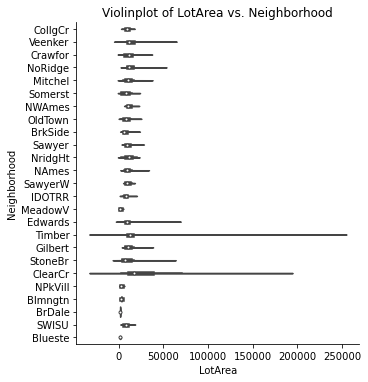

Neighborhood
Blmngtn     3398.18
Blueste     1625.00
BrDale      1801.00
BrkSide     7360.41
ClearCr    30875.75
CollgCr     9619.15
Crawfor    11809.69
Edwards    10218.65
Gilbert    11379.15
IDOTRR      8109.16
MeadowV     2324.00
Mitchel    11624.29
NAmes      10139.92
NPkVill     3267.44
NWAmes     11833.63
NoRidge    14218.90
NridgHt    10887.95
OldTown     8207.06
SWISU       8127.56
Sawyer     10459.28
SawyerW     9923.80
Somerst     7840.87
StoneBr    10671.92
Timber     23664.24
Veenker    15606.00
Name: LotArea, dtype: float64


In [10]:
# Lot area for each neighborhood
sns.catplot(x="LotArea", y="Neighborhood",kind="violin", data=df)
plt.title('Violinplot of LotArea vs. Neighborhood')
plt.show()
print(round(df.groupby('Neighborhood')['LotArea'].mean(),2))

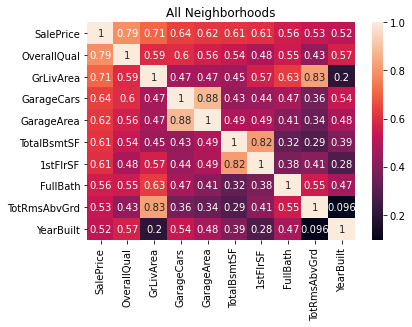

In [11]:
# Correlation between SalePrice and various variables for all neighborhoods
corrmat = df.corr()
cols = corrmat.nlargest(10,'SalePrice')['SalePrice'].index
cm   = np.corrcoef(df[cols].values.T)
sns.heatmap(cm,annot=True,yticklabels=cols.values, xticklabels=cols.values)
plt.title("All Neighborhoods")
plt.show()

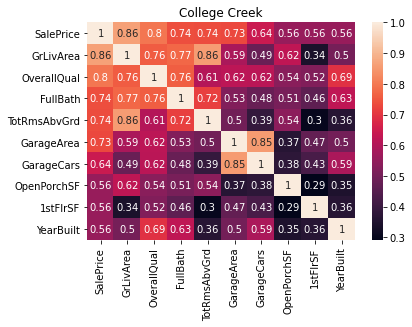

In [12]:
# Correlation between SalePrice and various variables for all CollgCr, the second largest neighborhood
College_Creek = df[df['Neighborhood'] == 'CollgCr']
corrmat = College_Creek.corr()
cols = corrmat.nlargest(10,'SalePrice')['SalePrice'].index
cm   = np.corrcoef(College_Creek[cols].values.T)
sns.heatmap(cm,annot=True,yticklabels=cols.values, xticklabels=cols.values)
plt.title("College Creek")
plt.show()
# Some significant differences from heat map above - may be worth noting

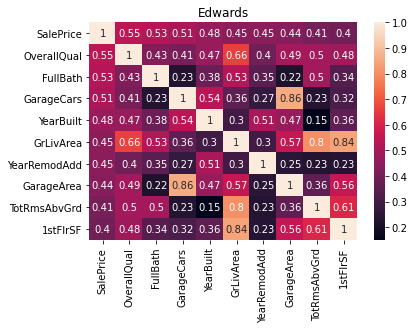

In [13]:
# Correlation between SalePrice and various variables for the Neighborhood Edwards
Edwards = df[df['Neighborhood'] == 'Edwards']
corrmat = Edwards.corr()
cols = corrmat.nlargest(10,'SalePrice')['SalePrice'].index
cm   = np.corrcoef(Edwards[cols].values.T)
sns.heatmap(cm,annot=True,yticklabels=cols.values, xticklabels=cols.values)
plt.title("Edwards")
plt.show()
# Correlations are much lower in this neighborhood